# Bank Customer Churn Analysis


## Business Understanding

Banking is a vital sector that provides financial services to individuals and businesses. In this context, customer churn refers to the loss of customers or subscribers due to various factors, such as changes in plans, dissatisfaction with service, or other reasons. By analyzing customer churn data, banks can identify patterns and trends that can help them develop strategies to improve customer retention and reduce customer churn.

In this project, I will analyze the customer churn data of a bank. The goal is to identify patterns and trends that can help the bank make informed decisions to improve customer retention and reduce customer churn.




## Problem statement

The bank has a dataset containing information about clients, including demographic data, credit data, and other relevant factors. The goal is to use this data to develop a predictive model that can accurately predict whether a client will subscribe to a term deposit. The model will be evaluated using appropriate metrics to measure its performance.

### Project Goal
To address the customer churn problem, I will employ various data analysis techniques which is the CRISP-DM me and machine learning algorithms to develop a predictive model that accurately predicts whether a client will subscribe to a term deposit. The model will be evaluated using appropriate metrics, such as accuracy, precision, recall, and F1-score, to assess its performance.



### Stakeholders

The stakeholders in this project include:

1. Bank: The bank wants to understand its customer churn patterns and develop strategies to improve customer retention.
2. Data Scientists: The data scientists will analyze the customer churn data, develop the predictive model, and evaluate its performance.
3. Marketing and Sales: The marketing and sales teams will use the predictive model to make data-driven decisions to improve customer engagement and retention.




### Features

   1. age (numeric)
   2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4. education (categorical: "unknown","secondary","primary","tertiary")
   5. default: has credit in default? (binary: "yes","no")
   6. balance: average yearly balance, in euros (numeric) 
   7. housing: has housing loan? (binary: "yes","no")
   8 . loan: has personal loan? (binary: "yes","no")

   ##### related with the last contact of the current campaign:
   9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10. day: last contact day of the month (numeric)
  11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12. duration: last contact duration, in seconds (numeric)

   ##### Other attributes:
  13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15. previous: number of contacts performed before this campaign and for this client (numeric)
  16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

   ##### Output variable (desired target):
  17. y - has the client subscribed a term deposit? (binary: "yes","no")




### Hypothesis

The hypothesis is that the predictive model developed will have a high accuracy and precision, indicating that it can accurately predict whether a client will subscribe to a term deposit.

Null hypothesis:

H0: The predictive model developed will have a low accuracy or precision.

Alternative Hypothesis:

H1: The predictive model developed will have a high accuracy or precision.


### Analytcal Questions 

To answer the above questions, I will perform the following steps:

1. Data Exploration: Load the customer churn dataset, perform exploratory data analysis (EDA) to understand the data, identify missing values, and examine the distribution of the target variable (customer churn).
2. Data Preprocessing: Handle missing values, handle categorical variables, and perform any necessary data preprocessing steps such as scaling or encoding.
3. Feature Selection: Select relevant features that contribute to the target variable.






## Data Understanding


Importing all the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import joblib
import warnings
warnings.filterwarnings('ignore')







#### Loading all the dataset and Exploratory Data Analysis 

In [2]:
# Load the data - bank-full

df1 = pd.read_csv('../Data/bank-full.csv',sep=';')

df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Load the data -  bank-additional-full
df2 = pd.read_csv('../Data/bank-additional-full.csv',sep=';')


df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Train dataset

### For bank full dataset


In [4]:
# Function to determine the year 
def get_year1(df):
    # Ensure months are in lowercase for consistent comparison
    df1['month'] = df1['month'].str.lower()

    # Initialize the starting year
    current_year = 2008

    # Set the year for all rows initially
    df1['year'] = current_year  

    # Iterate over the rows to update the year when a transition from December to January is encountered
    for i in range(1, len(df)):
        if df.loc[i, 'month'] == 'jan' and df.loc[i - 1, 'month'] == 'dec':
            current_year += 1  
        df.loc[i, 'year'] = current_year  

    return df

# Apply the function
df1_A= get_year1(df1)

# Display results
df1_A

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2008
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2008
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2008
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2008
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2010
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,2010
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,2010
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,2010


In [5]:
# Mapping of month names to month numbers
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Function to determine the datetime
def get_datetime(df):
    df['datetime'] = df.apply(
        lambda row: datetime(year=row['year'], 
                             month=month_map[row['month'].lower()], 
                             day=row['day']),
        axis=1
    )
    return df

# Apply the function
dfA1 = get_datetime(df1_A)

# Display results
dfA1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,datetime
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,2008,2008-05-05
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2008,2008-05-05
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2008,2008-05-05
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2008,2008-05-05
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,2008,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,2010,2010-11-17
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,2010,2010-11-17
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,2010,2010-11-17
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,2010,2010-11-17


In [6]:
# Extract the day_of_week from the datetime column
dfA1['day_of_week'] = dfA1['datetime'].dt.strftime('%a').str.lower()

# Reorder columns
columns = ['datetime', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration',
            'day', 'day_of_week', 'month', 'year', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
dfA1 = dfA1[columns]

# Display results
dfA1

,datetime,age,job,marital,education,default,balance,housing,loan,contact,duration,day,day_of_week,month,year,campaign,pdays,previous,poutcome,y
0,2008-05-05,58,management,married,tertiary,no,2143,yes,no,unknown,261,5,mon,may,2008,1,-1,0,unknown,no
1,2008-05-05,44,technician,single,secondary,no,29,yes,no,unknown,151,5,mon,may,2008,1,-1,0,unknown,no
2,2008-05-05,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,5,mon,may,2008,1,-1,0,unknown,no
3,2008-05-05,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,5,mon,may,2008,1,-1,0,unknown,no
4,2008-05-05,33,unknown,single,unknown,no,1,no,no,unknown,198,5,mon,may,2008,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,2010-11-17,51,technician,married,tertiary,no,825,no,no,cellular,977,17,wed,nov,2010,3,-1,0,unknown,yes
45207,2010-11-17,71,retired,divorced,primary,no,1729,no,no,cellular,456,17,wed,nov,2010,2,-1,0,unknown,yes
45208,2010-11-17,72,retired,married,secondary,no,5715,no,no,cellular,1127,17,wed,nov,2010,5,184,3,success,yes
45209,2010-11-17,57,blue-collar,married,secondary,no,668,no,no,telephone,508,17,wed,nov,2010,4,-1,0,unknown,no


### For bank full additional datasets

In [7]:
# Function to determine the year
def get_year2(df):
    # Ensure months are in lowercase for consistent comparison
    df['month'] = df['month'].str.lower()

    # Initialize the starting year
    current_year = 2008

    # Set the year for all rows initially
    df['year'] = current_year  

    # Iterate over the rows to update the year when a transition from December to March is encountered
    for i in range(1, len(df)):
        # Check if we encounter a transition from December to March
        if df.loc[i, 'month'] == 'mar' and df.loc[i - 1, 'month'] == 'dec':
            current_year += 1
        df.loc[i, 'year'] = current_year

    return df

# Apply the function
df2_B = get_year2(df2)

# Display results
df2_B

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010


In [8]:
# Mapping days of the week to numeric order
day_map = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}

# Function to determine the day of the month
def get_day_of_month(df, start_date):
    # Initialise a start date
    current_date = start_date
    day_of_month = []
    last_dow = None 
    
    for _, row in df.iterrows():
        # Convert month to numeric
        month_num = month_map[row['month'].lower()] if isinstance(row['month'], str) else row['month']
        
        target_dow = day_map[row['day_of_week']]
        
        # Check if the current day_of_week is different from the last one
        if row['day_of_week'] != last_dow:
            # Advance the date to match
            while current_date.weekday() != target_dow:
                current_date += pd.Timedelta(days=1)
        
        # Check year and month consistency
        if current_date.year != int(row['year']) or current_date.month != month_num:
            # Reset the current date to the 1st of the new month
            current_date = pd.Timestamp(year=int(row['year']), month=month_num, day=1)
            while current_date.weekday() != target_dow:
                current_date += pd.Timedelta(days=1)

         # Append the day of the month
        day_of_month.append(current_date.day)
        
        # Track the current day_of_week
        last_dow = row['day_of_week']
    
    # Add the results to the DataFrame
    df['day'] = day_of_month
    
    return df
        
# Starting date: First Monday after May 1, 2008
start_date = pd.Timestamp(year=2008, month=5, day=1) + pd.Timedelta(days=4)

# Apply the function
df2_B = get_day_of_month(df2_B, start_date)

# Display results
df2_B

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,year,day
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,5
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,5
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,5
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010,26
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010,26
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2010,26
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,2010,26


In [9]:
# Apply the function
dfB2 = get_datetime(df2_B)

# Reorder columns
columns = ['datetime', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
           'day', 'day_of_week', 'month', 'year', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
dfB2 = dfB2[columns]

# Display results
dfB2

,datetime,age,job,marital,education,default,housing,loan,contact,duration,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2008-05-05,56,housemaid,married,basic.4y,no,no,no,telephone,261,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2008-05-05,57,services,married,high.school,unknown,no,no,telephone,149,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2008-05-05,37,services,married,high.school,no,yes,no,telephone,226,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2008-05-05,40,admin.,married,basic.6y,no,no,no,telephone,151,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,2008-05-05,56,services,married,high.school,no,no,yes,telephone,307,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2010-11-26,73,retired,married,professional.course,no,yes,no,cellular,334,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2010-11-26,46,blue-collar,married,professional.course,no,no,no,cellular,383,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,2010-11-26,56,retired,married,university.degree,no,yes,no,cellular,189,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2010-11-26,44,technician,married,professional.course,no,no,no,cellular,442,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
#### Concatenate the bank full data and bank additonal full datasets

# Concatenate the training data along rows
df_train = pd.concat([dfA1, dfB2], ignore_index=True)

# Display the shape of the dataset
print(f"Shape of the dataframe: {df_train.shape}")

# Reorder columns
columns = ['datetime', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration',
            'day', 'day_of_week', 'month', 'year', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
df_train = df_train[columns]

# Sort the DataFrame by the 'datetime' column
df_train = df_train.sort_values(by='datetime').reset_index(drop=True)

# Display results
df_train.head()

Shape of the dataframe: (86399, 25)


,datetime,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2008-05-05,58,management,married,tertiary,no,2143.0,yes,no,unknown,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
1,2008-05-05,52,admin.,divorced,university.degree,no,NaN,no,no,telephone,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2008-05-05,57,blue-collar,divorced,unknown,unknown,NaN,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2008-05-05,56,admin.,married,unknown,no,NaN,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,2008-05-05,48,blue-collar,divorced,basic.4y,unknown,NaN,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# Define the mapping dictionary
education_mapping = {
    'basic.9y': 'primary',
    'unknown': 'unknown',
    'high.school': 'secondary',
    'basic.4y': 'primary',
    'basic.6y': 'primary',
    'secondary': 'secondary',
    'primary': 'primary',
    'professional.course': 'tertiary',
    'university.degree': 'tertiary',
    'tertiary': 'tertiary',
    'illiterate': 'uneducated'
}

# Apply the mapping to the education column
df_train['education'] = df_train['education'].map(education_mapping)

# Verify the changes
print(df_train['education'].unique())

['tertiary' 'unknown' 'primary' 'secondary' 'uneducated']


### Test Dataset
- bank data
- additional bank data

In [12]:
# Load the data - bank csv
df3 = pd.read_csv('../Data/bank.csv',sep=';')

df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
# Identify common columns for merge
common_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration',
                  'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Perform left join
dfA3 = pd.merge(df3, dfA1, on=common_columns, how='left')

# Reorder columns
columns = ['datetime', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration',
            'day', 'day_of_week', 'month', 'year', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
dfA3 = dfA3[columns]

# Sort the DataFrame by the 'datetime' column
dfA3 = dfA3.sort_values(by='datetime').reset_index(drop=True)

# Display results
dfA3

,datetime,age,job,marital,education,default,balance,housing,loan,contact,duration,day,day_of_week,month,year,campaign,pdays,previous,poutcome,y
0,2008-05-05,49,services,married,secondary,no,47,no,no,unknown,234,5,mon,may,2008,2,-1,0,unknown,no
1,2008-05-05,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,380,5,mon,may,2008,1,-1,0,unknown,no
2,2008-05-05,44,blue-collar,married,secondary,no,-674,yes,no,unknown,257,5,mon,may,2008,1,-1,0,unknown,no
3,2008-05-05,55,blue-collar,married,primary,no,627,yes,no,unknown,247,5,mon,may,2008,1,-1,0,unknown,no
4,2008-05-05,31,blue-collar,married,secondary,no,0,yes,no,unknown,143,5,mon,may,2008,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2010-11-09,35,technician,married,secondary,no,0,yes,no,cellular,524,9,tue,nov,2010,1,96,5,success,yes
4517,2010-11-11,36,admin.,single,tertiary,no,980,no,no,cellular,118,11,thu,nov,2010,4,104,7,failure,no
4518,2010-11-16,36,management,single,secondary,no,1511,yes,no,cellular,270,16,tue,nov,2010,1,-1,0,unknown,yes
4519,2010-11-16,75,retired,divorced,tertiary,no,3810,yes,no,cellular,262,16,tue,nov,2010,1,183,1,failure,yes


In [14]:
dfA3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     4521 non-null   datetime64[ns]
 1   age          4521 non-null   int64         
 2   job          4521 non-null   object        
 3   marital      4521 non-null   object        
 4   education    4521 non-null   object        
 5   default      4521 non-null   object        
 6   balance      4521 non-null   int64         
 7   housing      4521 non-null   object        
 8   loan         4521 non-null   object        
 9   contact      4521 non-null   object        
 10  duration     4521 non-null   int64         
 11  day          4521 non-null   int64         
 12  day_of_week  4521 non-null   object        
 13  month        4521 non-null   object        
 14  year         4521 non-null   int64         
 15  campaign     4521 non-null   int64         
 16  pdays 

### Bank additional data

In [15]:
# Load the data -additional bank csv
df4 = pd.read_csv('../Data/bank-additional.csv',sep=';')

df4.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [16]:
# Identify common columns for merge
common_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
                  'day_of_week', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m',	'nr.employed', 'y']

# Perform the left join
dfB4 = pd.merge(df4, dfB2, on=common_columns, how='left')

# Reorder columns
columns = ['datetime', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration',
            'day_of_week', 'month', 'year', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m',	'nr.employed', 'y']
dfB4 = dfB4[columns]

# Sort the DataFrame by the 'datetime' column
dfB4 = dfB4.sort_values(by='datetime').reset_index(drop=True)

# Display results
dfB4

,datetime,age,job,marital,education,default,housing,loan,contact,duration,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2008-05-05,50,blue-collar,divorced,high.school,unknown,no,yes,telephone,200,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2008-05-05,45,services,married,professional.course,no,yes,no,telephone,221,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2008-05-05,38,unknown,divorced,high.school,unknown,yes,no,telephone,73,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2008-05-05,30,blue-collar,single,unknown,no,yes,yes,telephone,408,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,2008-05-05,54,management,single,basic.9y,no,yes,no,telephone,224,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,2010-11-23,60,blue-collar,married,basic.4y,no,yes,no,cellular,347,...,2,4,1,success,-1.1,94.767,-50.8,1.035,4963.6,no
4116,2010-11-24,32,admin.,married,university.degree,no,yes,no,cellular,236,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,no
4117,2010-11-24,38,housemaid,divorced,university.degree,no,no,no,cellular,403,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.030,4963.6,yes
4118,2010-11-25,57,retired,married,professional.course,no,yes,no,cellular,124,...,6,999,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6,no


In [17]:
dfB4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        4120 non-null   datetime64[ns]
 1   age             4120 non-null   int64         
 2   job             4120 non-null   object        
 3   marital         4120 non-null   object        
 4   education       4120 non-null   object        
 5   default         4120 non-null   object        
 6   housing         4120 non-null   object        
 7   loan            4120 non-null   object        
 8   contact         4120 non-null   object        
 9   duration        4120 non-null   int64         
 10  day_of_week     4120 non-null   object        
 11  month           4120 non-null   object        
 12  year            4120 non-null   int64         
 13  campaign        4120 non-null   int64         
 14  pdays           4120 non-null   int64         
 15  prev

In [18]:
# Concatenate the test data along rows
df_test = pd.concat([dfA3, dfB4], ignore_index=True)

# Display the shape of the dataset
print(f"Shape of the dataframe: {df_test.shape}")

# Reorder columns
columns = ['datetime', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration',
            'day', 'day_of_week', 'month', 'year', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m',	'nr.employed', 'y']
df_test = df_test[columns]

# Sort the DataFrame by the 'datetime' column
df_test = df_test.sort_values(by='datetime').reset_index(drop=True)

# Display results
df_test.head()

Shape of the dataframe: (8641, 25)


,datetime,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2008-05-05,49,services,married,secondary,no,47.0,no,no,unknown,...,2,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
1,2008-05-05,45,services,married,professional.course,no,NaN,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2008-05-05,38,unknown,divorced,high.school,unknown,NaN,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2008-05-05,30,blue-collar,single,unknown,no,NaN,yes,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,2008-05-05,54,management,single,basic.9y,no,NaN,yes,no,telephone,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# Print column names of all Dataframes
print("Column names of Train dataframe:")
print(df_train.columns)

print("\nColumn names Test dataframe:")
print(df_test.columns)

Column names of Train dataframe:
Index(['datetime', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'day', 'day_of_week', 'month',
       'year', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Column names Test dataframe:
Index(['datetime', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'day', 'day_of_week', 'month',
       'year', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [20]:
# Define the mapping dictionary
education_mapping = {
    'basic.9y': 'primary',
    'unknown': 'unknown',
    'high.school': 'secondary',
    'basic.4y': 'primary',
    'basic.6y': 'primary',
    'secondary': 'secondary',
    'primary': 'primary',
    'professional.course': 'tertiary',
    'university.degree': 'tertiary',
    'tertiary': 'tertiary',
    'illiterate': 'uneducated'
}

# Apply the mapping to the education column
df_test['education'] = df_test['education'].map(education_mapping)

# Verify the changes
print(df_test['education'].unique())

['secondary' 'tertiary' 'unknown' 'primary' 'uneducated']


### Train Dataset for EDA
df_train_eda: df_train.copy()

In [21]:
# Create a copy of the original DataFrame
df_train_eda = df_train.copy()

# Identify important columns
important_columns = ['datetime', 'age', 'job', 'marital', 'education', 'day', 'month', 'year', 'contact', 'campaign', 'duration']


# Check for duplicates in the training concatenated data
duplicate_count = df_train_eda.duplicated(subset=important_columns, keep=False).sum()
duplicates = df_train_eda.duplicated(subset=important_columns, keep='first')

# Display results
print(f"Number of duplicated rows in df_train_eda: {duplicate_count}")
df_train_eda[duplicates]

Number of duplicated rows in df_train_eda: 140


,datetime,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2596,2008-05-08,39,blue-collar,married,primary,no,NaN,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
4696,2008-05-13,55,retired,married,primary,unknown,NaN,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7102,2008-05-15,45,blue-collar,married,primary,no,NaN,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
13850,2008-05-28,34,services,married,secondary,no,1182.0,yes,no,unknown,...,1,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
15840,2008-06-02,29,admin.,single,secondary,no,2768.0,yes,no,unknown,...,4,-1,0,unknown,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2009-07-02,45,admin.,married,tertiary,no,NaN,no,no,cellular,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
79934,2009-10-07,63,retired,married,secondary,no,NaN,yes,no,cellular,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.740,5017.5,no
80056,2009-10-13,71,retired,single,tertiary,no,NaN,no,no,telephone,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
81295,2009-11-23,62,blue-collar,married,primary,no,NaN,yes,no,cellular,...,1,6,1,success,-3.4,92.649,-30.1,0.719,5017.5,no


In [22]:
# Drop duplicated rows from training dataset
df_train_eda = df_train_eda.drop_duplicates(subset=important_columns, keep='first')

# Check for duplicates in the training concatenated data
duplicate_count = df_train_eda.duplicated(subset=important_columns, keep=False).sum()
duplicates = df_train_eda.duplicated(subset=important_columns, keep='first')

# Display results
print(f"Number of duplicated rows in df_train: {duplicate_count}")
df_train_eda[duplicates]

Number of duplicated rows in df_train: 0


,datetime,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [31]:
# Get the list of all column names in the DataFrame
columns = df_train_eda.columns

# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_train_eda[column].unique().size} unique values')  
    print(f'{df_train_eda[column].unique()}')  
    print('_' * 80)

datetime
There are 591 unique values
<DatetimeArray>
['2008-05-05 00:00:00', '2008-05-06 00:00:00', '2008-05-07 00:00:00',
 '2008-05-08 00:00:00', '2008-05-09 00:00:00', '2008-05-12 00:00:00',
 '2008-05-13 00:00:00', '2008-05-14 00:00:00', '2008-05-15 00:00:00',
 '2008-05-16 00:00:00',
 ...
 '2010-11-15 00:00:00', '2010-11-16 00:00:00', '2010-11-17 00:00:00',
 '2010-11-18 00:00:00', '2010-11-19 00:00:00', '2010-11-22 00:00:00',
 '2010-11-23 00:00:00', '2010-11-24 00:00:00', '2010-11-25 00:00:00',
 '2010-11-26 00:00:00']
Length: 591, dtype: datetime64[ns]
________________________________________________________________________________
age
There are 80 unique values
[58 52 57 56 48 40 49 41 45 36 32 50 31 37 35 42 55 33 53 44 54 43 34 60
 39 38 24 46 51 28 59 25 29 30 47 27 26 22 61 23 20 21 19 18 67 75 65 70
 83 62 66 64 68 69 72 71 76 85 90 63 82 74 73 78 80 94 79 88 95 77 86 81
 17 89 87 84 91 92 98 93]
________________________________________________________________________________
j

In [32]:
# Display the value counts for 'education' column
df_train_eda['education'].value_counts()

education
secondary     32694
tertiary      30688
primary       19343
unknown        3586
uneducated       18
Name: count, dtype: int64

In [33]:
# Display the value counts for 'poutcome' column
df_train_eda['poutcome'].value_counts()

poutcome
unknown        36941
nonexistent    35521
failure         9144
success         2883
other           1840
Name: count, dtype: int64

In [34]:
# Merge 'nonexistent' with 'unknown' in 'poutcome' column
df_train_eda['poutcome'] = df_train_eda['poutcome'].replace({'nonexistent': 'unknown'})

# Display results
df_train_eda['poutcome'].value_counts()

poutcome
unknown    72462
failure     9144
success     2883
other       1840
Name: count, dtype: int64

In [35]:
# Determine the proportion of missing values
missing_percentage = (df_train_eda.isnull().mean() * 100).round(2)

# Check for duplicated values
duplicate_count = df_train_eda.duplicated(subset=None, keep=False).sum()

# Display Results
print("Proportion of missing values in df_train_eda:\n")
print(missing_percentage)
print(f"\nNumber of duplicated rows in df_train_eda: {duplicate_count}")

Proportion of missing values in df_train_eda:

datetime           0.00
age                0.00
job                0.00
marital            0.00
education          0.00
default            0.00
balance           47.65
housing            0.00
loan               0.00
contact            0.00
duration           0.00
day                0.00
day_of_week        0.00
month              0.00
year               0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate      52.35
cons.price.idx    52.35
cons.conf.idx     52.35
euribor3m         52.35
nr.employed       52.35
y                  0.00
dtype: float64

Number of duplicated rows in df_train_eda: 0


In [36]:
# Drop duplicated rows from training dataset
df_train_eda = df_train_eda.drop_duplicates(subset=important_columns, keep='first')

# Check for duplicates in the training concatenated data
duplicate_count = df_train_eda.duplicated(subset=important_columns, keep=False).sum()
duplicates = df_train_eda.duplicated(subset=important_columns, keep='first')

# Display results
print(f"Number of duplicated rows in df_train: {duplicate_count}")
df_train_eda[duplicates]

Number of duplicated rows in df_train: 0


,datetime,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [37]:
# Display summary statistics for all object (categorical) columns in the DataFrame
df_train_eda.describe(include='object').T

,count,unique,top,freq
job,86329,12,blue-collar,18966
marital,86329,4,married,52093
education,86329,5,secondary,32694
default,86329,3,no,76923
housing,86329,3,yes,46668
loan,86329,3,no,71861
contact,86329,3,cellular,55370
day_of_week,86329,7,thu,18354
month,86329,12,may,27516
poutcome,86329,4,unknown,72462


### Univariate Analysis

#### Grouping Features

In [38]:
# Target Variable
target = ['y']  

# Customer Demographics
customer_demographics = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Customer Financial Details
customer_financial_details = ['balance']

# Campaign Interaction
campaign_interaction = ['contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

# Temporal Information
temporal_info = ['day', 'day_of_week', 'month', 'year']

# Economic Indicators
economic_indicators = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#### Target Variable

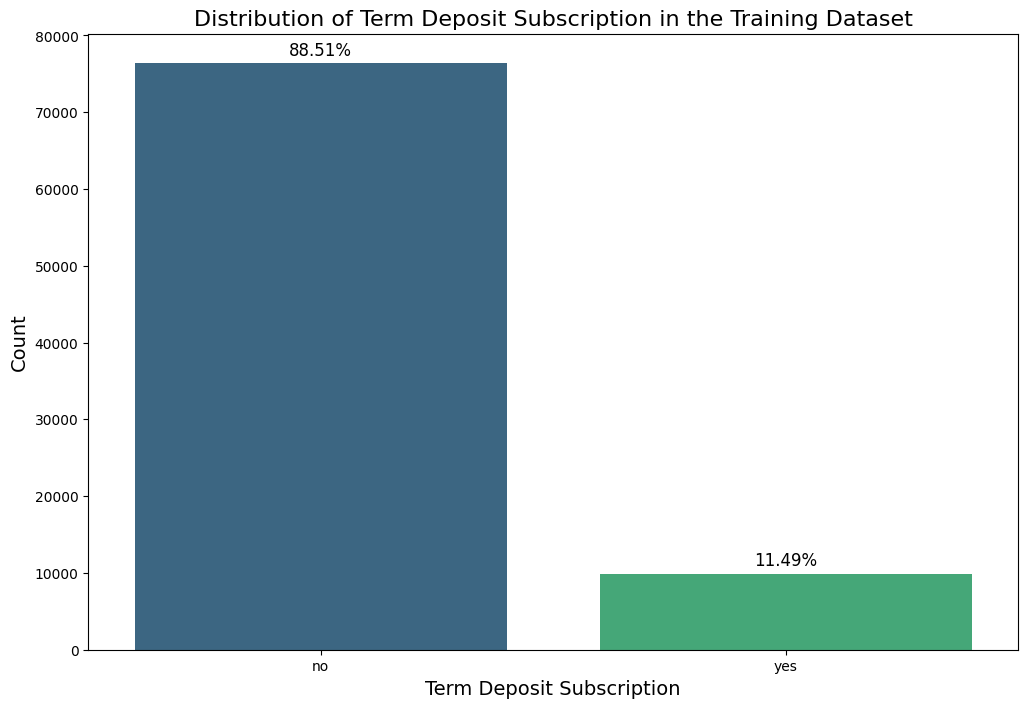

In [39]:
# Plot target variable distribution
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df_train_eda[target[0]], palette='viridis')

# Add percentage labels on top of the bars
total = len(df_train_eda)
for container in ax.containers:
    labels = [f'{(h.get_height() / total) * 100:.2f}%' for h in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=12)

# Set plot titles and labels
plt.title('Distribution of Term Deposit Subscription in the Training Dataset', fontsize=16)
plt.xlabel('Term Deposit Subscription', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display plot
plt.show()

##### Comments

### Customer demograhics

Categorical features

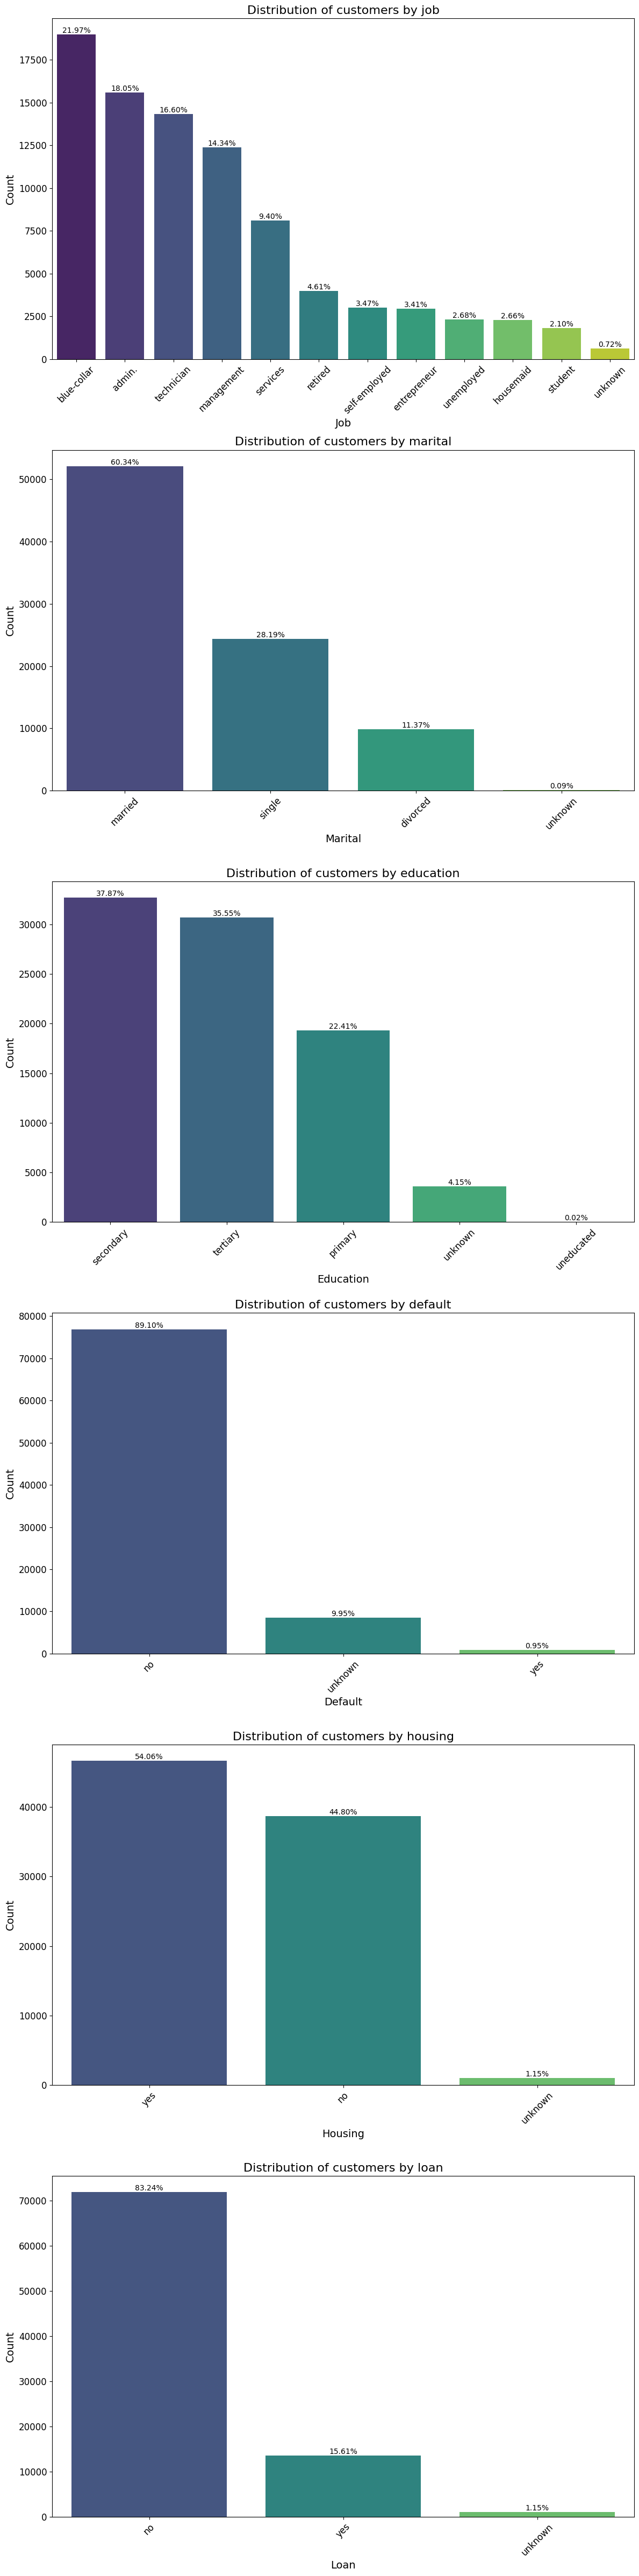

In [40]:
# Number of rows needed for categorical plots
num_features = len(customer_demographics) - 1  
n_rows = num_features

# Create a figure with the required number of rows
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 8 * n_rows))

# Loop through each feature to plot (except 'age')
for idx, feature in enumerate(customer_demographics[1:]):
    # Calculate value counts and sort in descending order
    value_counts = df_train_eda[feature].value_counts(normalize=True).sort_values(ascending=False)
    sorted_categories = value_counts.index
    
    # Create a count plot with the sorted categories
    sns.countplot(x=df_train_eda[feature], palette='viridis', order=sorted_categories, ax=axes[idx])
    
    # Add percentage labels on top of the bars
    total = len(df_train_eda)
    for container in axes[idx].containers:
        labels = [f'{h.get_height()/total*100:.2f}%' if h.get_height() > 0 else '' for h in container]
        axes[idx].bar_label(container, labels=labels)
    
    # Set plot titles and labels
    axes[idx].set_title(f'Distribution of customers by {feature}', fontsize=16)
    axes[idx].set_xlabel(feature.capitalize(), fontsize=14)
    axes[idx].set_ylabel('Count', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=12)
    axes[idx].tick_params(axis='y', labelsize=12)

# Display plot
plt.tight_layout()
plt.show()

#### Numerical features

Column: age
Skewness: 0.73
Kurtosis: 0.53
Mean: 40.5
Median: 39.0
Standard Deviation: 10.53
________________________________________


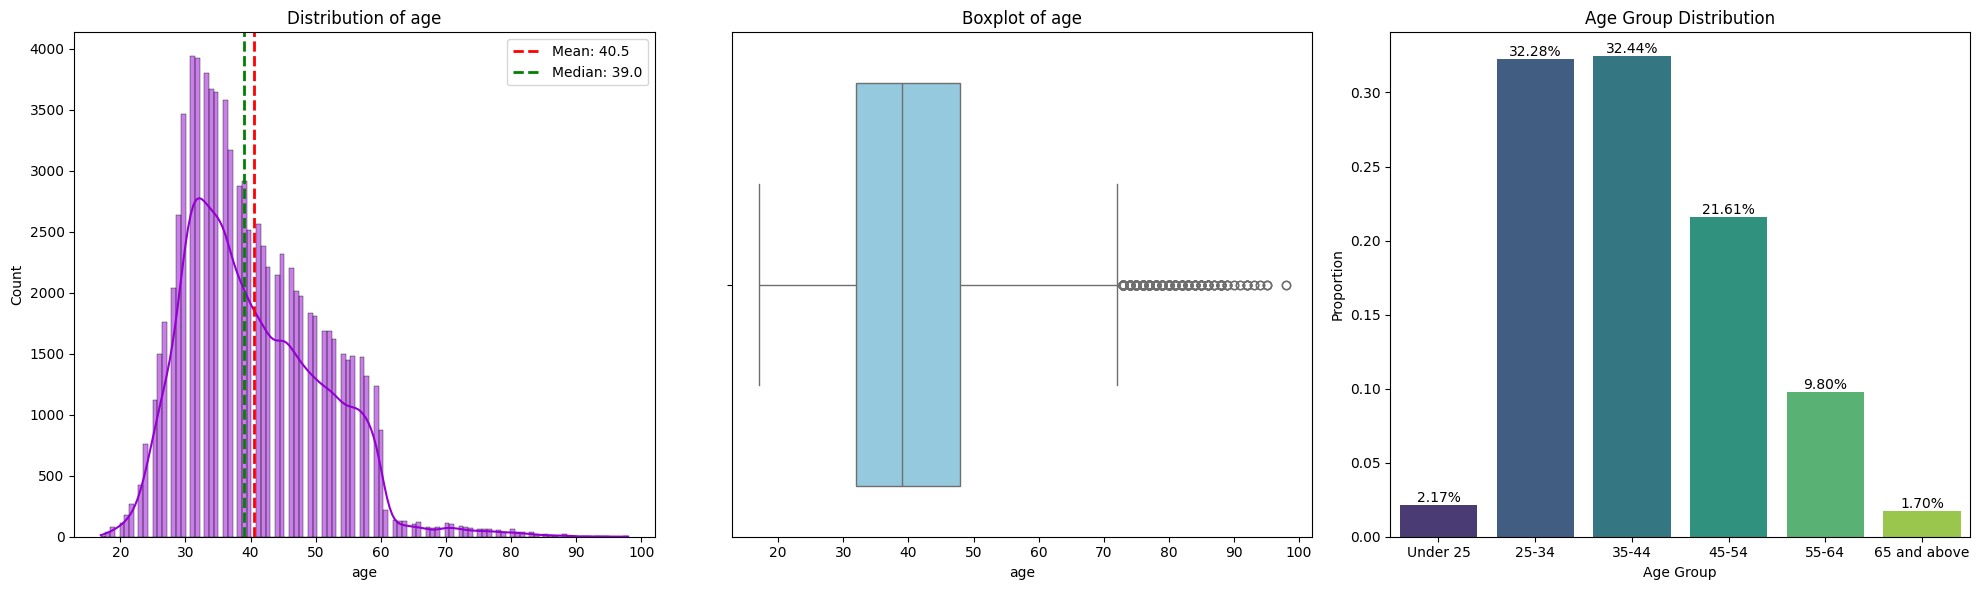

In [41]:
# Identify 'age' for detailed numerical analysis
age_feature = customer_demographics[0]

# Calculate skewness and kurtosis
skewness = round(df_train_eda[age_feature].skew(), 2)
kurtosis = round(df_train_eda[age_feature].kurtosis(), 2)

# Calculate basic statistics
mean = round(df_train_eda[age_feature].mean(), 2)
median = round(df_train_eda[age_feature].median(), 2)
std_dev = round(df_train_eda[age_feature].std(), 2)

# Print column name and its statistics
print(f"Column: {age_feature}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print("_" * 40)

# Create bins for age groups
age_bins = [0, 24, 34, 44, 54, 64, 150]
age_labels = ['Under 25', '25-34', '35-44', '45-54', '55-64', '65 and above']
df_train_eda['age_group'] = pd.cut(df_train_eda[age_feature], bins=age_bins, labels=age_labels, right=True)

# Plot histogram-KDE, boxplot and barplot
plt.figure(figsize=(20, 6))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df_train_eda[age_feature], kde=True, color='darkviolet', edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.title(f'Distribution of {age_feature}')
plt.xlabel(age_feature)
plt.ylabel('Count')
plt.legend()

# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df_train_eda[age_feature], color='skyblue')
plt.title(f'Boxplot of {age_feature}')

# Bar plot
plt.subplot(1, 3, 3)
age_group_counts = df_train_eda['age_group'].value_counts(normalize=True).sort_index()  # Ensure order matches `age_labels`
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
for i, v in enumerate(age_group_counts.values):
    plt.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Proportion')

# Display plots
plt.tight_layout()
plt.show()

#### Customer financial information

Column: balance
Skewness: 8.36
Kurtosis: 140.71
Mean: 1362.36
Median: 448.0
Standard Deviation: 3045.3
________________________________________


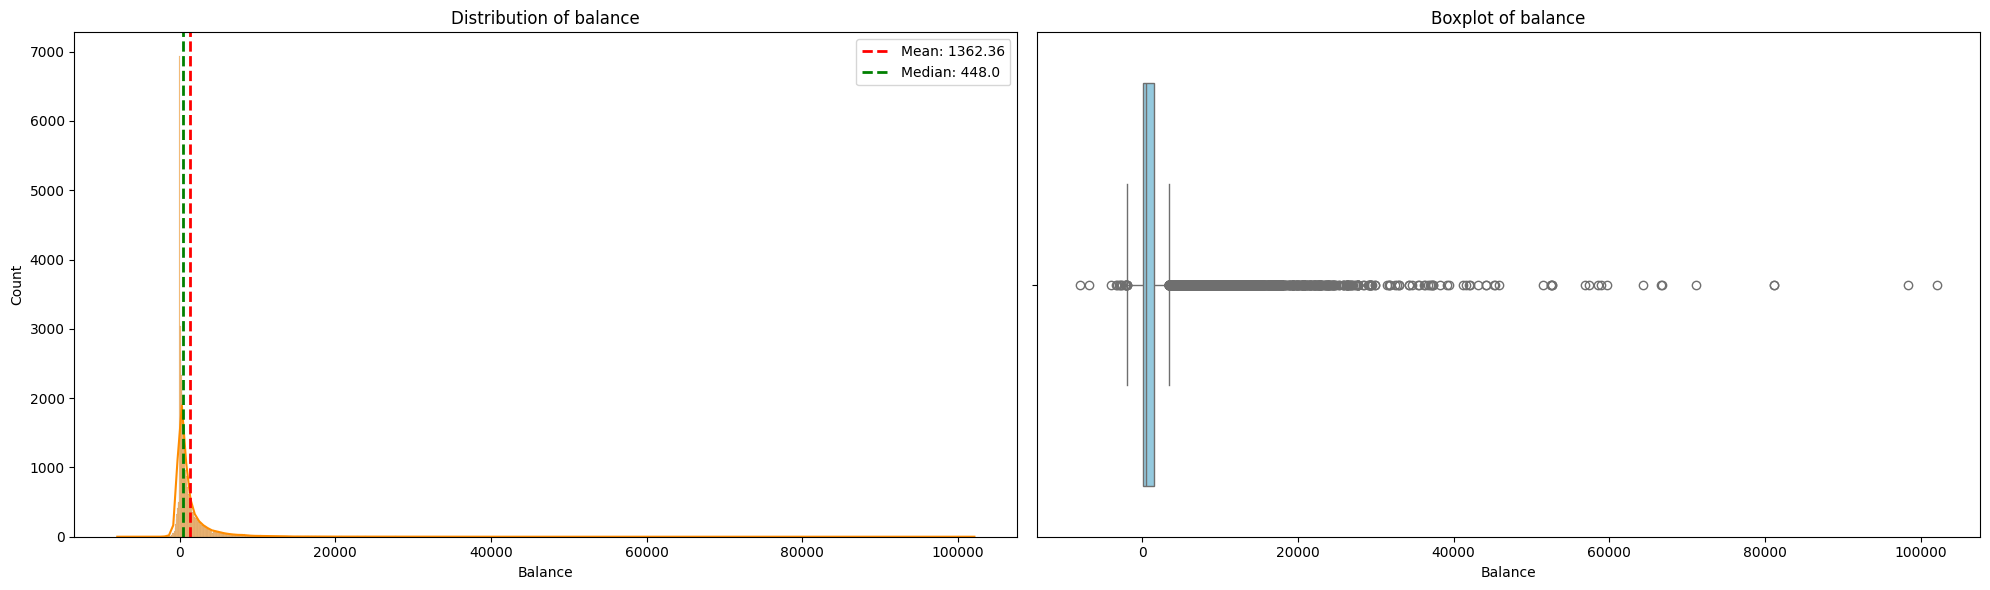

In [42]:
# # Loop through each feature to plot
for feature in customer_financial_details:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[feature].skew(), 2)
    kurtosis = round(df_train_eda[feature].kurtosis(), 2)

    # Calculate basic statistics
    mean = round(df_train_eda[feature].mean(), 2)
    median = round(df_train_eda[feature].median(), 2)
    std_dev = round(df_train_eda[feature].std(), 2)

    # Print feature name and statistics
    print(f"Column: {feature}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)

    # Plot histogram-KDE and boxplot
    plt.figure(figsize=(20, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[feature], kde=True, color='darkorange', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature.capitalize())

    # Display plots
    plt.tight_layout()
    plt.show()

### Campaign Interaction

In [43]:
# Separate categorical and numerical features
categorical_campaign_features = [feature for feature in campaign_interaction if df_train_eda[feature].dtype == 'object']
numerical_campaign_features = [feature for feature in campaign_interaction if df_train_eda[feature].dtype != 'object']

##### Categorical features

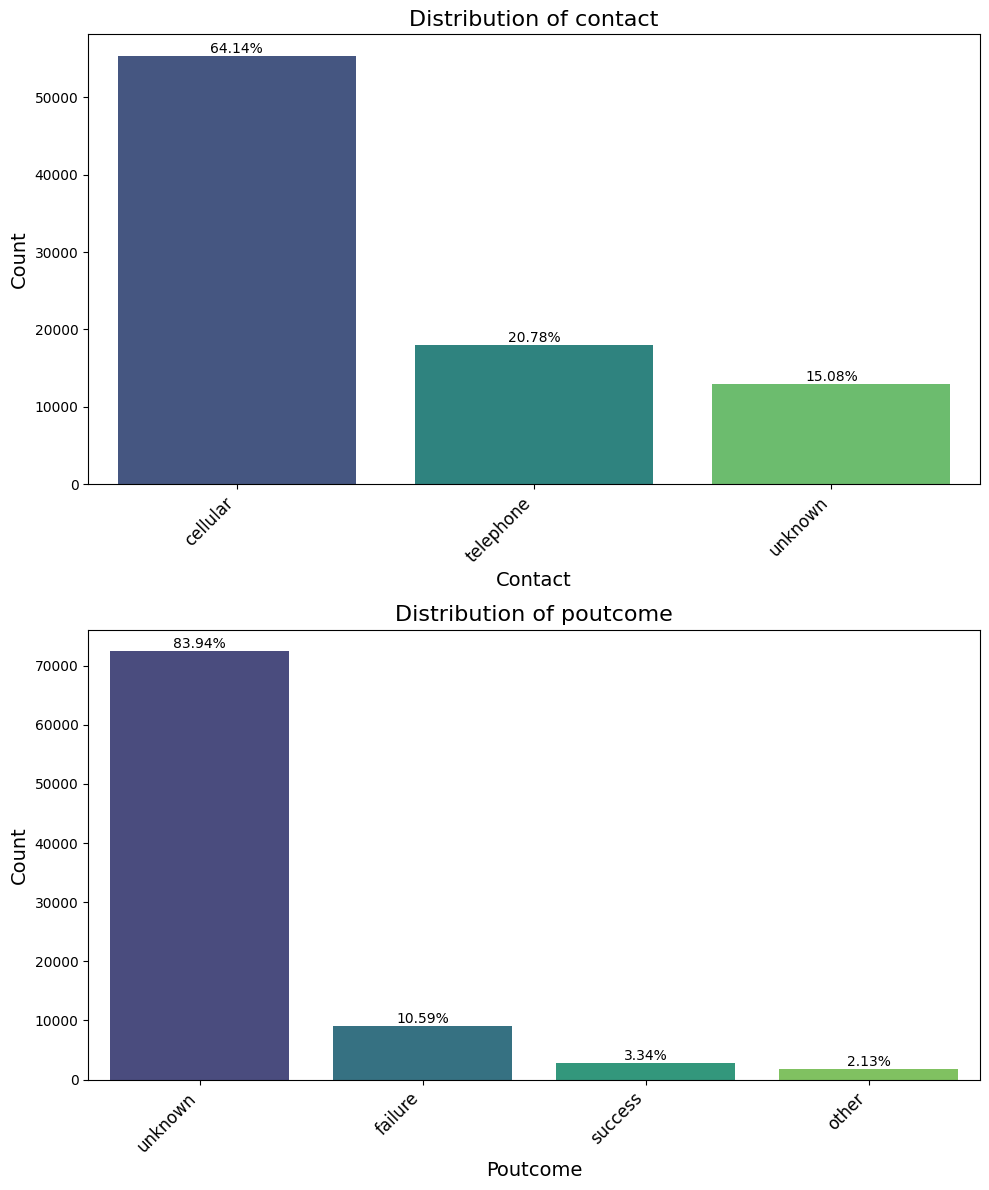

In [44]:
# Number of rows needed for categorical plots
num_rows_categorical = len(categorical_campaign_features)

# Create subplots for categorical features
plt.figure(figsize=(10, 6 * num_rows_categorical))

# Loop through each categorical feature
for i, feature in enumerate(categorical_campaign_features, 1):
    # Calculate value counts and percentages
    value_counts = df_train_eda[feature].value_counts(normalize=True).sort_values(ascending=False)
    sorted_categories = value_counts.index

    # Create subplot for each categorical feature
    plt.subplot(num_rows_categorical, 1, i)
    
    # Plot count plot
    sns.countplot(x=df_train_eda[feature], order=sorted_categories, palette='viridis')

    # Add percentage labels
    total = len(df_train_eda)
    for container in plt.gca().containers:
        labels = [f'{h.get_height() / total * 100:.2f}%' if h.get_height() > 0 else '' for h in container]
        plt.gca().bar_label(container, labels=labels)

    # Set titles and labels
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)

# Display plots
plt.tight_layout()
plt.show()

### Numerical features

Column: duration
Skewness: 3.2
Kurtosis: 19.16
Mean: 258.27
Median: 180.0
Standard Deviation: 258.41
________________________________________


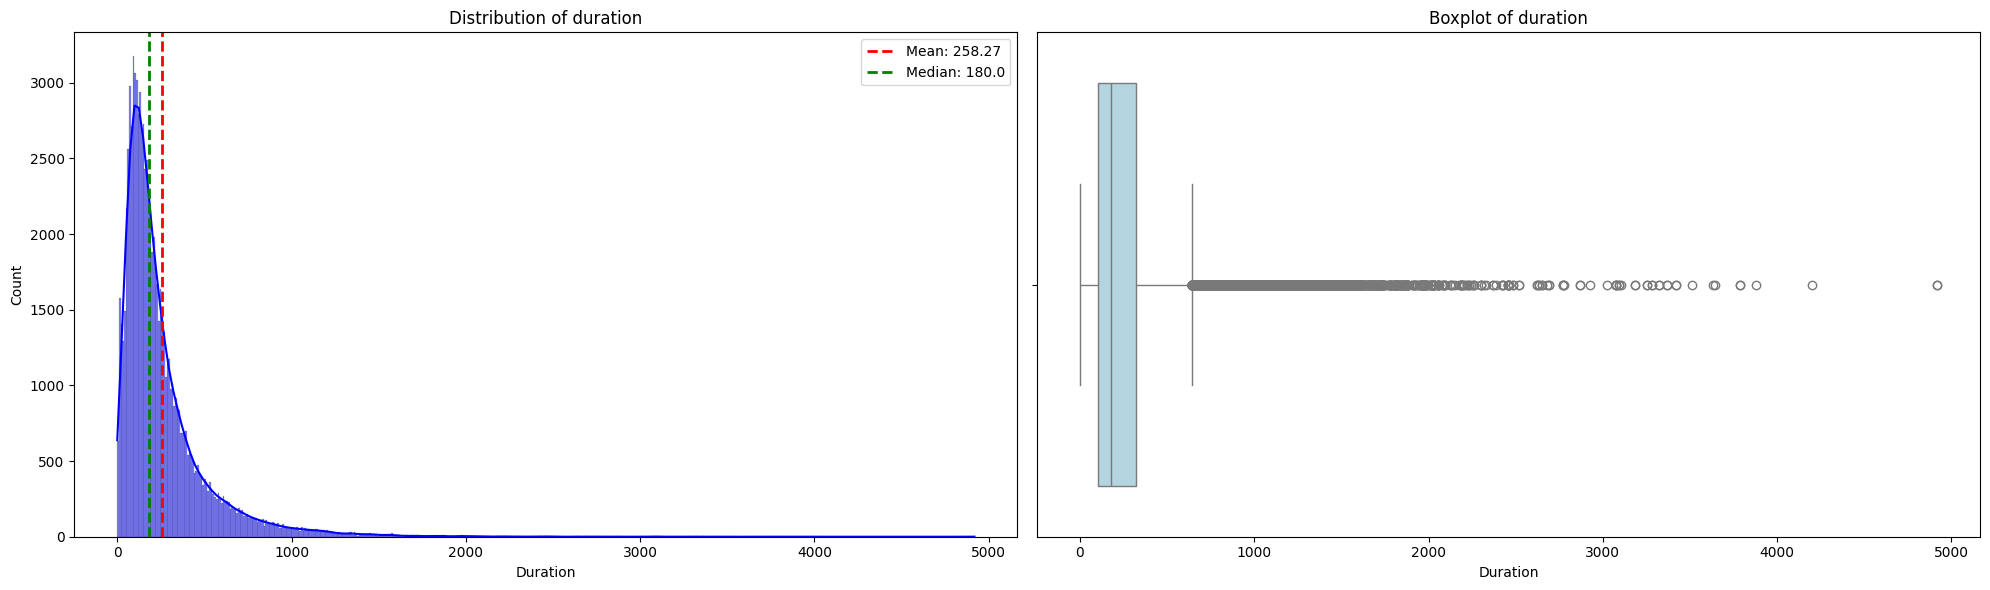

Column: campaign
Skewness: 4.87
Kurtosis: 38.93
Mean: 2.67
Median: 2.0
Standard Deviation: 2.95
________________________________________


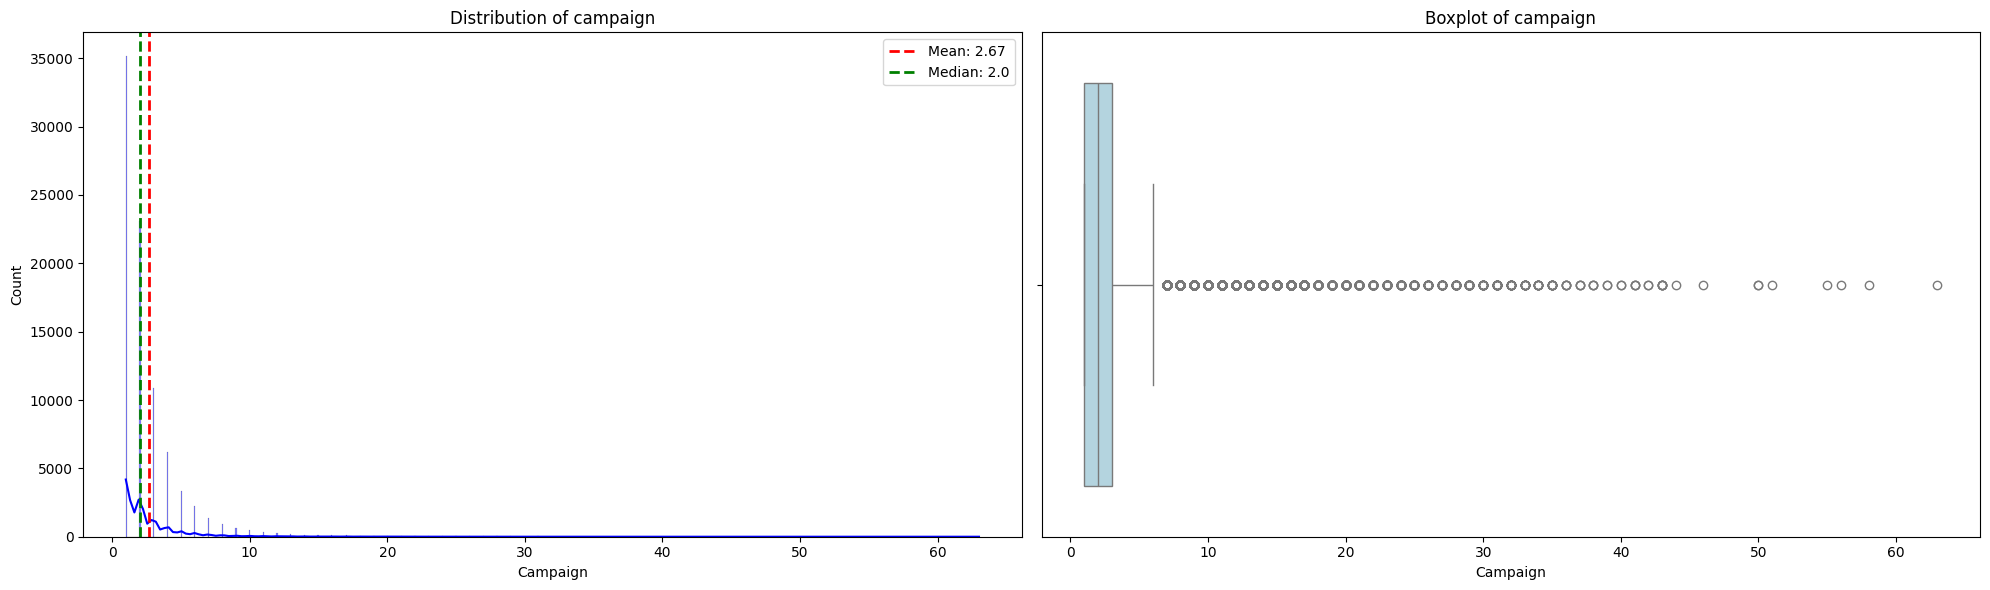

Column: pdays
Skewness: 0.11
Kurtosis: -1.94
Mean: 479.68
Median: 245.0
Standard Deviation: 483.81
________________________________________


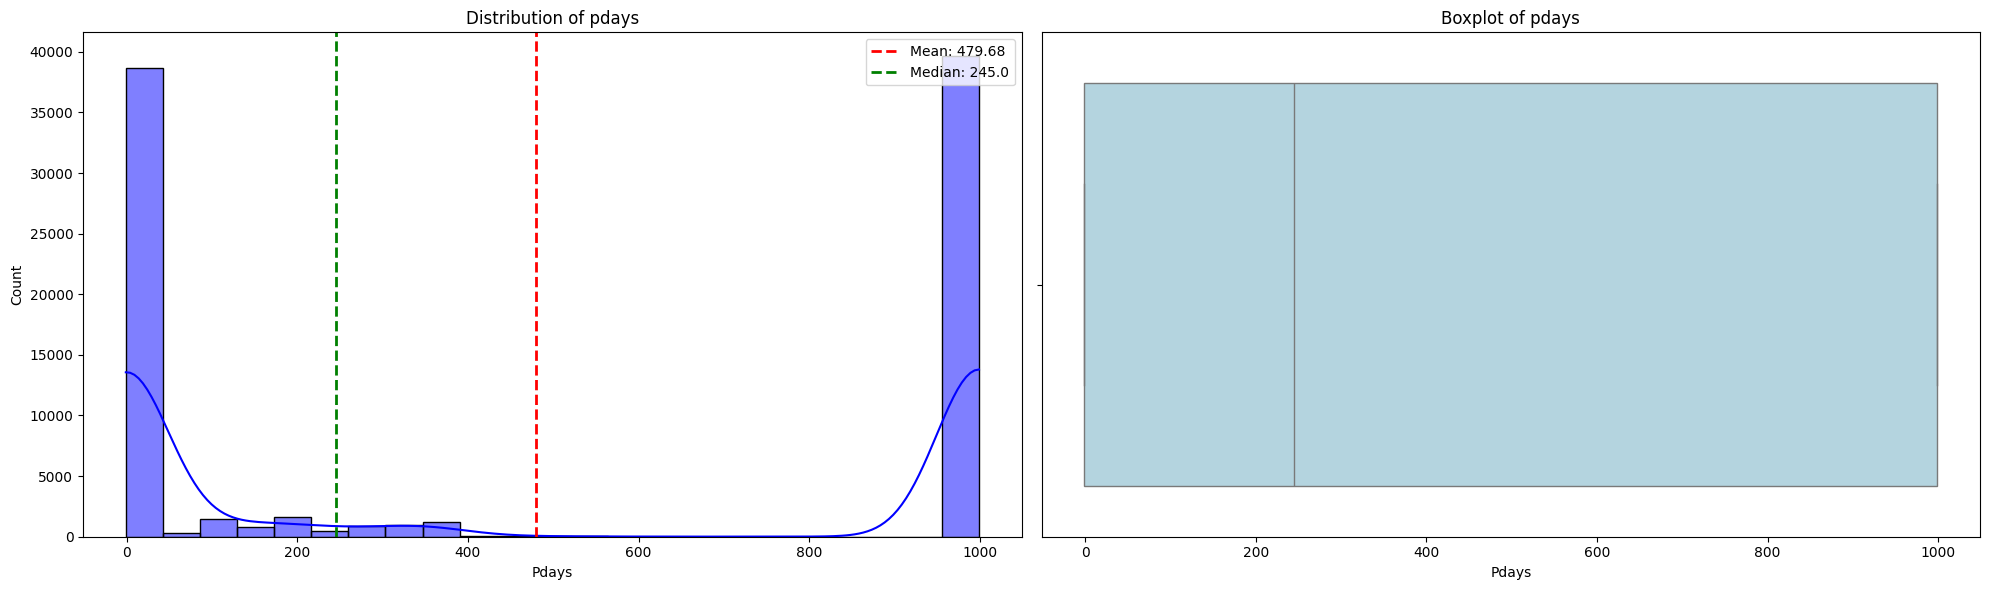

Column: previous
Skewness: 53.57
Kurtosis: 7730.24
Mean: 0.39
Median: 0.0
Standard Deviation: 1.71
________________________________________


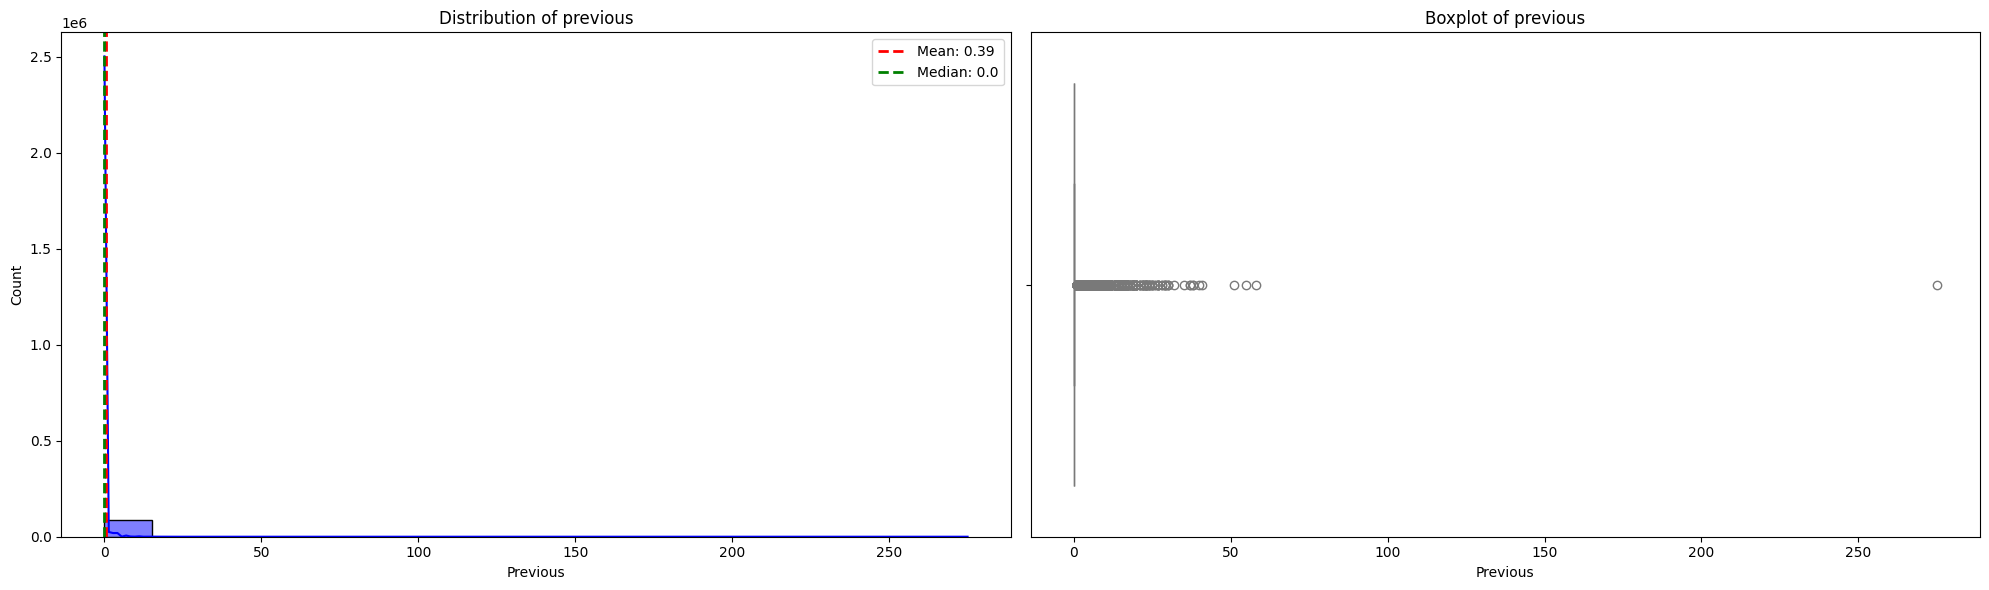

In [45]:
# Loop through each numerical feature
for feature in numerical_campaign_features:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[feature].skew(), 2)
    kurtosis = round(df_train_eda[feature].kurtosis(), 2)

    # Calculate basic statistics
    mean = round(df_train_eda[feature].mean(), 2)
    median = round(df_train_eda[feature].median(), 2)
    std_dev = round(df_train_eda[feature].std(), 2)

    # Print feature name and statistics
    print(f"Column: {feature}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)

    # Plot histogram-KDE and boxplot
    plt.figure(figsize=(20, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[feature], kde=True, color='blue', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature.capitalize())

    # Display plots
    plt.tight_layout()
    plt.show()

#### Temporal Information

In [46]:
# Separate categorical and numerical features
categorical_temporal_features = [feature for feature in temporal_info if df_train_eda[feature].dtype == 'object' or feature == 'year']
numerical_temporal_features = [feature for feature in temporal_info if feature != 'year' and df_train_eda[feature].dtype != 'object']

#### Categorical features

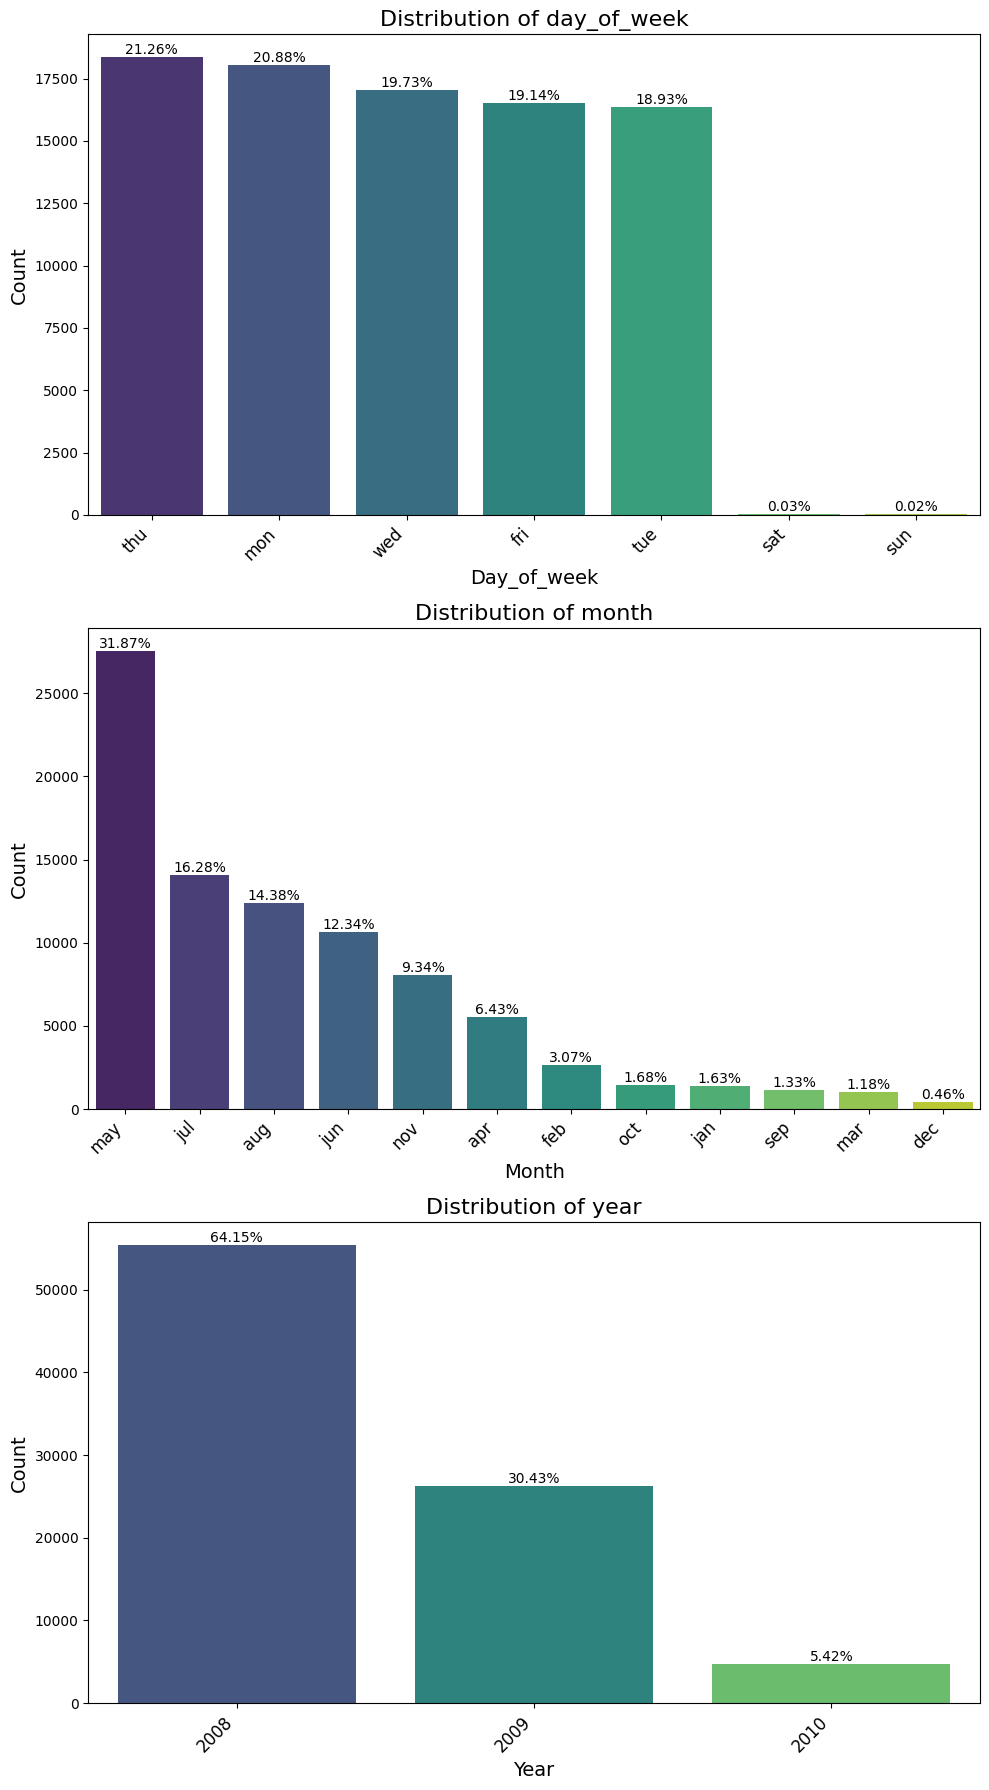

In [47]:
# Number of rows needed for categorical plots
num_rows_categorical = len(categorical_temporal_features)

# Create subplots for categorical features
plt.figure(figsize=(10, 6 * num_rows_categorical))

# Loop through each categorical feature
for i, feature in enumerate(categorical_temporal_features, 1):
    # Calculate value counts and percentages
    value_counts = df_train_eda[feature].value_counts(normalize=True).sort_values(ascending=False)
    sorted_categories = value_counts.index

    # Create subplot for each categorical feature
    plt.subplot(num_rows_categorical, 1, i)
    
    # Plot count plot
    sns.countplot(x=df_train_eda[feature], order=sorted_categories, palette='viridis')

    # Add percentage labels
    total = len(df_train_eda)
    for container in plt.gca().containers:
        labels = [f'{h.get_height() / total * 100:.2f}%' if h.get_height() > 0 else '' for h in container]
        plt.gca().bar_label(container, labels=labels)

    # Set titles and labels
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)

# Display plots
plt.tight_layout()
plt.show()

#### Numerical features 

Column: day
Skewness: 0.09
Kurtosis: -1.0
Mean: 15.82
Median: 16.0
Standard Deviation: 8.11
________________________________________


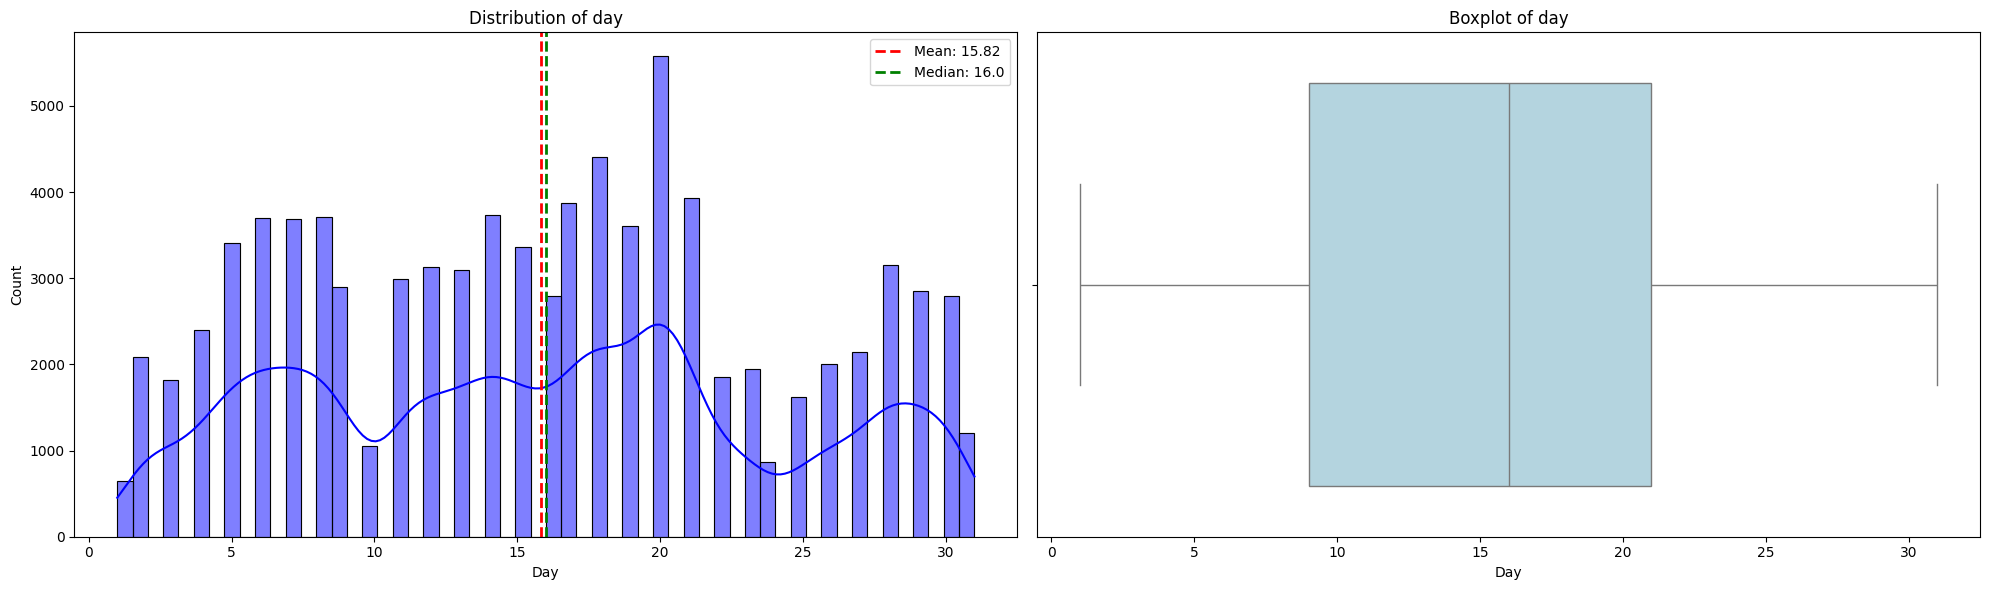

In [48]:
# Loop through each numerical features
for feature in numerical_temporal_features:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[feature].skew(), 2)
    kurtosis = round(df_train_eda[feature].kurtosis(), 2)

    # Calculate basic statistics
    mean = round(df_train_eda[feature].mean(), 2)
    median = round(df_train_eda[feature].median(), 2)
    std_dev = round(df_train_eda[feature].std(), 2)

    # Print feature name and statistics
    print(f"Column: {feature}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)

    # Plot histogram-KDE and boxplot
    plt.figure(figsize=(20, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[feature], kde=True, color='blue', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature.capitalize())

    # Display plots
    plt.tight_layout()
    plt.show()

#### Economic factors

Column: emp.var.rate
Skewness: -0.72
Kurtosis: -1.06
Mean: 0.08
Median: 1.1
Standard Deviation: 1.57
________________________________________


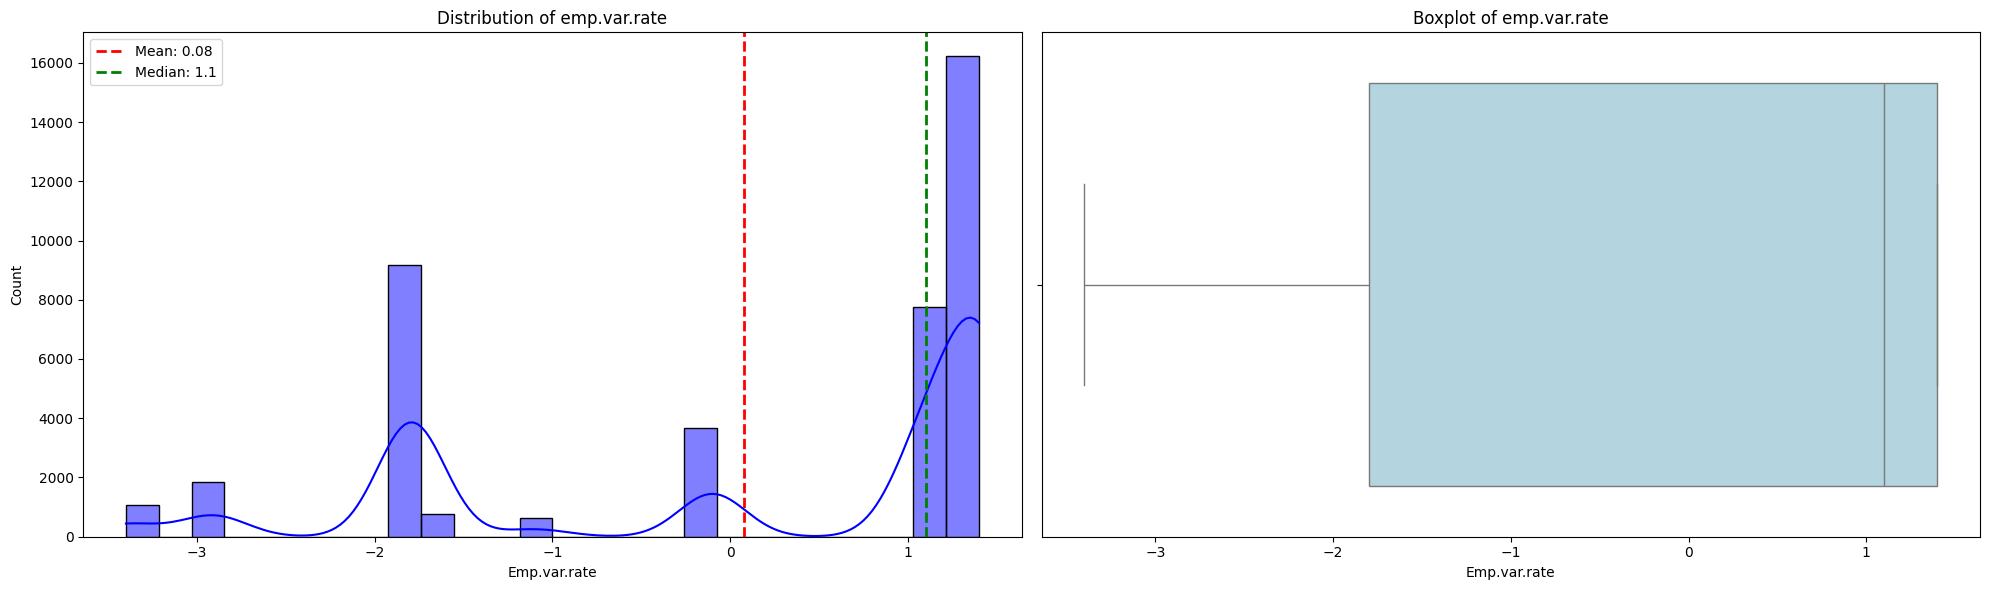

Column: cons.price.idx
Skewness: -0.23
Kurtosis: -0.83
Mean: 93.58
Median: 93.75
Standard Deviation: 0.58
________________________________________


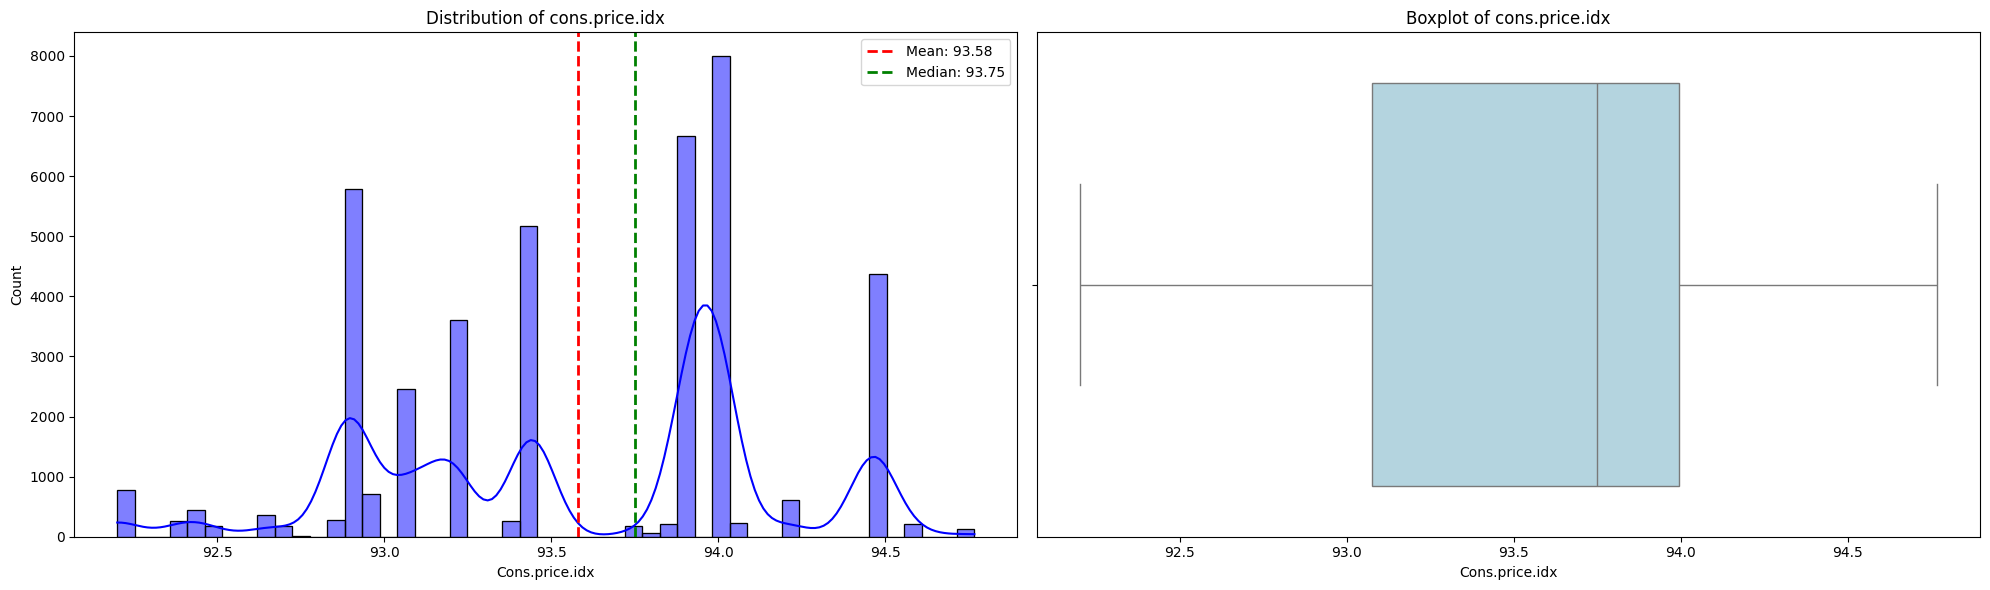

Column: cons.conf.idx
Skewness: 0.3
Kurtosis: -0.36
Mean: -40.5
Median: -41.8
Standard Deviation: 4.63
________________________________________


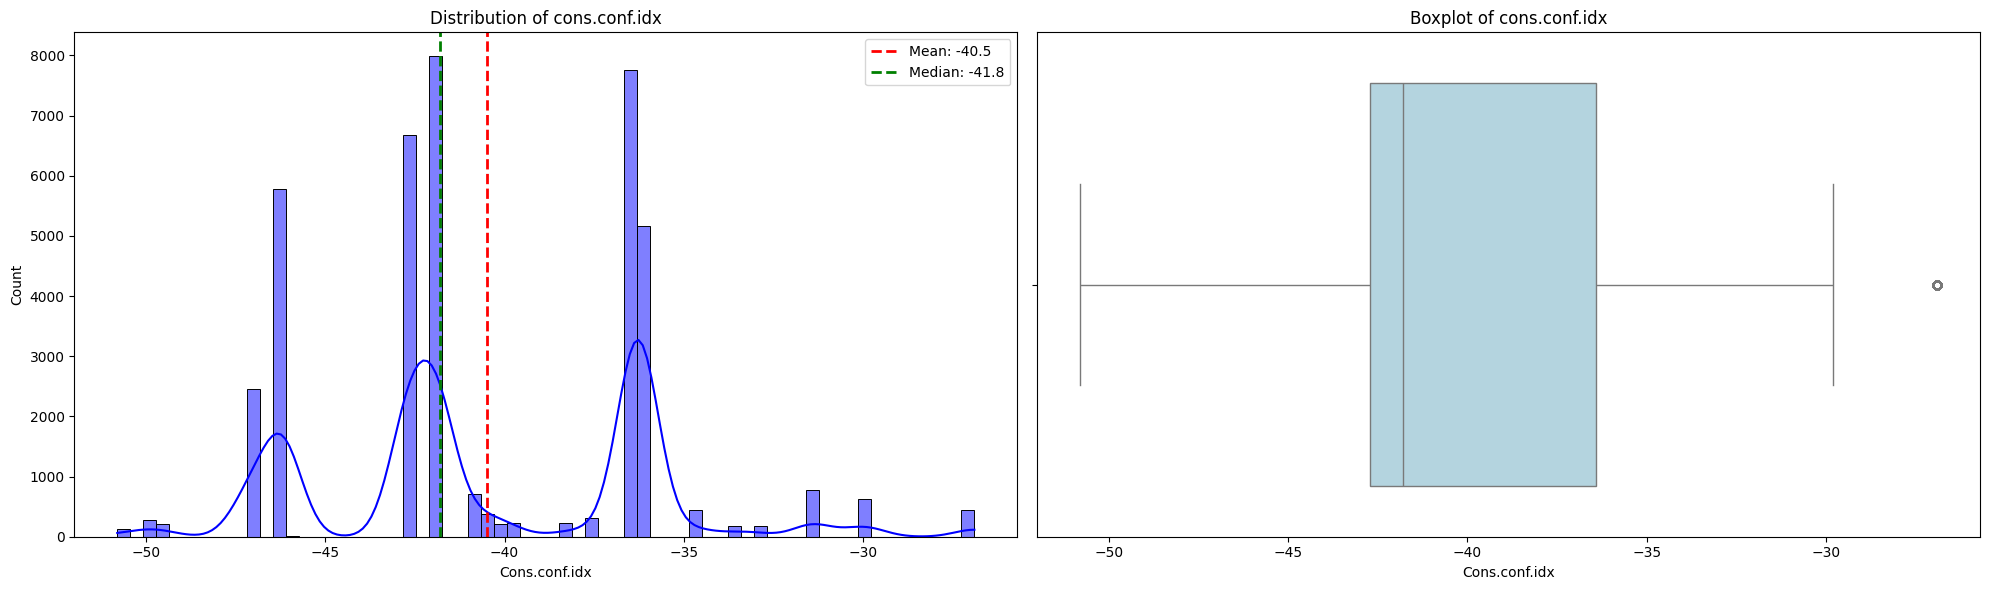

Column: euribor3m
Skewness: -0.71
Kurtosis: -1.41
Mean: 3.62
Median: 4.86
Standard Deviation: 1.73
________________________________________


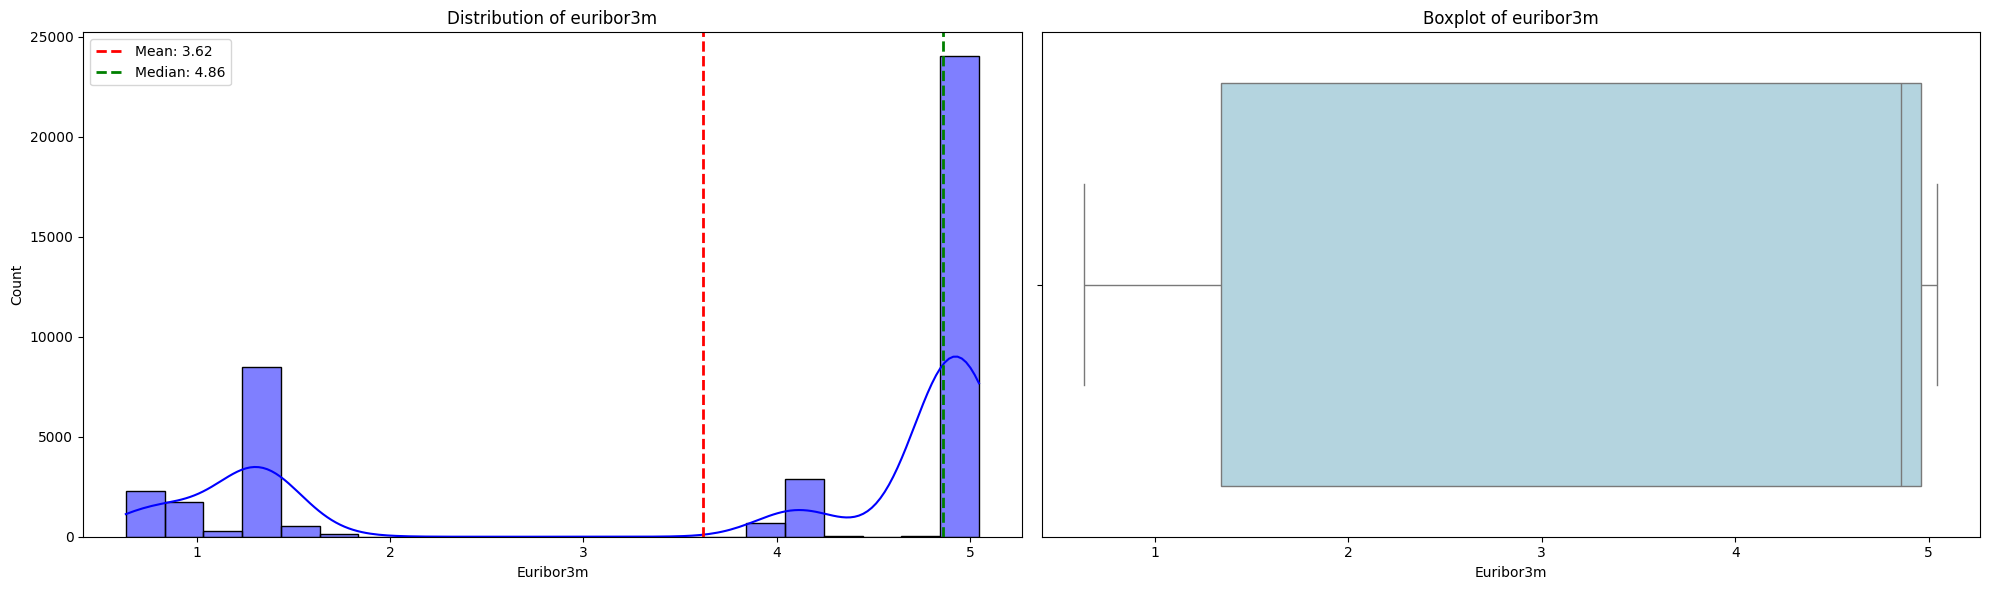

Column: nr.employed
Skewness: -1.05
Kurtosis: -0.0
Mean: 5167.05
Median: 5191.0
Standard Deviation: 72.26
________________________________________


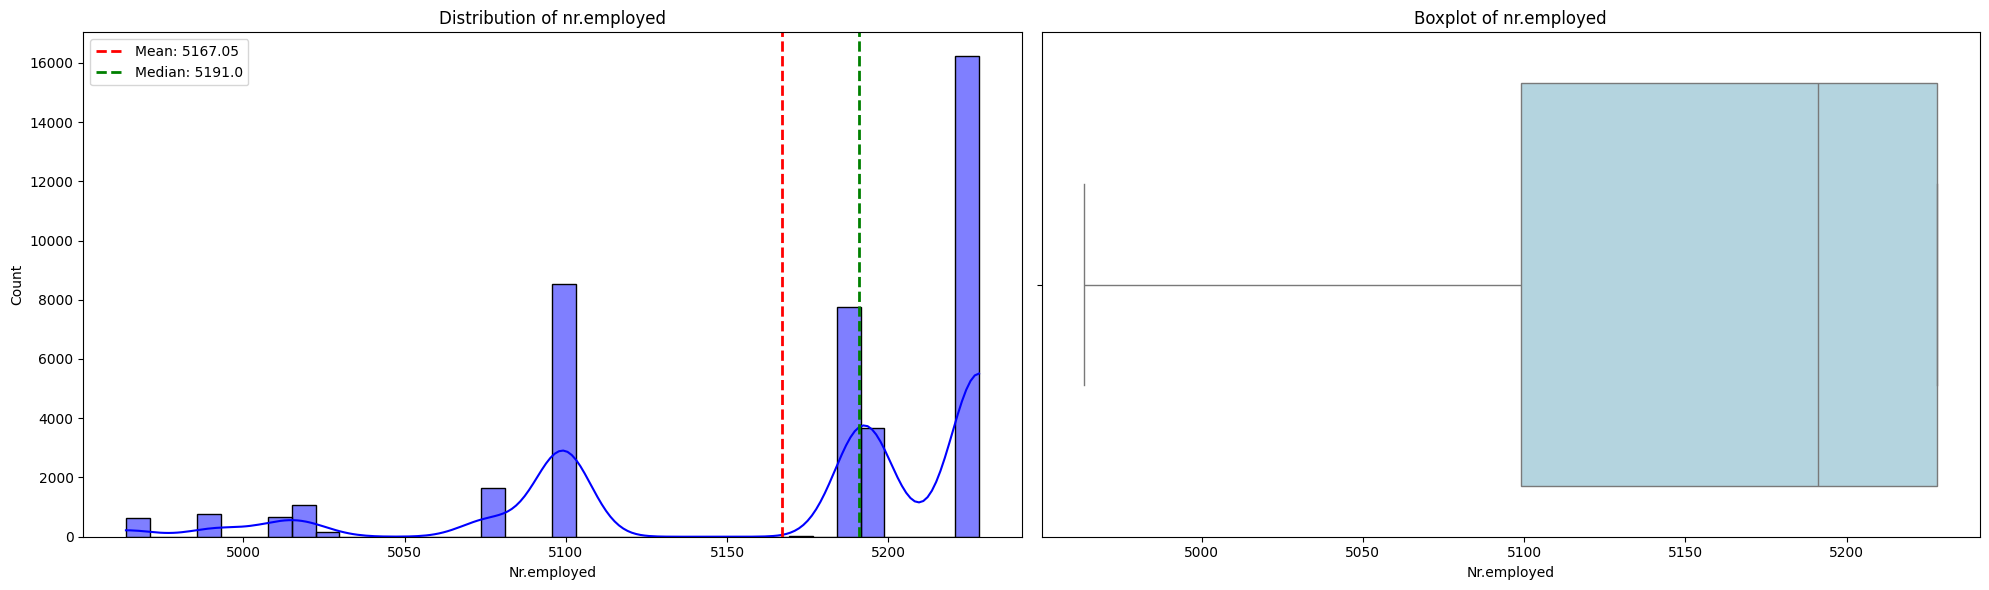

In [49]:
# Loop through each economic indicator feature
for feature in economic_indicators:
    # Calculate skewness and kurtosis
    skewness = round(df_train_eda[feature].skew(), 2)
    kurtosis = round(df_train_eda[feature].kurtosis(), 2)

    # Calculate basic statistics
    mean = round(df_train_eda[feature].mean(), 2)
    median = round(df_train_eda[feature].median(), 2)
    std_dev = round(df_train_eda[feature].std(), 2)

    # Print feature name and statistics
    print(f"Column: {feature}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print("_" * 40)

    # Plot histogram-KDE and boxplot
    plt.figure(figsize=(20, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_train_eda[feature], kde=True, color='blue', edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median}')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_train_eda[feature], color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature.capitalize())

    # Display plots
    plt.tight_layout()
    plt.show()

Handling Outliers

- Transformation Techniques: Apply log, square root, or cube root transformations to compress large values.

- Winsorization: Cap extreme values at specific percentiles (e.g., 1st and 99th).

- Scaling: Use robust scaling methods (e.g., RobustScaler) that are less sensitive to outliers.

- Trimming or Capping: Remove outliers or set thresholds to limit extreme values (e.g., cap above the 95th percentile).

- Imputation: Replace outliers with the median or nearest non-outlier values.

- Machine Learning Models: Use models like Random Forest or Gradient Boosting that are robust to outliers.

- Robust Statistical Measures: Apply robust estimators such as the median or trimmed means.

- Combining Methods: Often, a mix of transformation, scaling, and model adjustments provides the best results. Evaluate the impact of outlier treatment on model performance to choose the optimal approach.

### Bivariate Analysis

#### Feature Categorisation

In [50]:
# Numerical columns
numerical_features = df_train_eda.select_dtypes('number').columns.tolist()
if 'year' in numerical_features:
    numerical_features.remove('year')  

# Categorical columns
categorical_features = df_train_eda.select_dtypes('object').columns.tolist()
categorical_features = [feature for feature in categorical_features if feature != 'y']
if 'year' not in categorical_features:
    categorical_features.append('year')  

In [51]:
df_train_eda['age_group'].dtype

CategoricalDtype(categories=['Under 25', '25-34', '35-44', '45-54', '55-64',
                  '65 and above'],
, ordered=True, categories_dtype=object)